# 1. Implementing Logic Gates Using Perceptron Algorithm

In [ ]:
import numpy as np

### NOT
0 -> 1\
1 -> 0\
weight = -1\
bias = 1

In [ ]:
X = np.array([[0],[1]])
weights = np.array([-1])
bias = np.array([1])

out = X @ weights + bias
print(out)

[1 0]


### TAUGTOLOGY
0,0 -> 1\
0,1 -> 1\
1,0 -> 1\
1,1 -> 1\
weights = 0,0\
bias = 1

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[0],[0]])
bias = np.array([1])

out = X @ weights + bias
print(out)

[[1]
 [1]
 [1]
 [1]]


### AND
0,0 -> 0\
0,1 -> 0\
1,0 -> 0\
1,1 -> 1\
weights = 1,1\
bias = -1

In [ ]:
def step(x):
  return 1 if x>= 0.5 else 0

X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[1],[1]])
bias = np.array([-1])

out = X @ weights + bias
y = np.array(list(map(step, out)))
print(y)

[0 0 0 1]


### OR
0,0 -> 0\
0,1 -> 1\
1,0 -> 1\
1,1 -> 1\
weights = 1,1\
bias = 0

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[1],[1]])
bias = np.array([0])

out = X @ weights + bias
y = np.array(list(map(step, out)))
print(y)

[0 1 1 1]


### NOR
0,0 -> 1\
0,1 -> 0\
1,0 -> 0\
1,1 -> 0\
weights = -1,-1\
bias = 1

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[-1],[-1]])
bias = np.array([1])

out = X @ weights + bias
y = np.array(list(map(step, out)))
print(y)

[1 0 0 0]


### NAND
0,0 -> 1\
0,1 -> 1\
1,0 -> 1\
1,1 -> 0\
weights = -1,-1\
bias = 2

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[-1],[-1]])
bias = np.array([2])

out = X @ weights + bias
y = np.array(list(map(step, out)))
print(y)

[1 1 1 0]


### XOR
0,0 -> 0\
0,1 -> 1\
1,0 -> 1\
1,1 -> 0\
weights =[-1,1],[1,-1]\
bias = 1,1\
s(s(x@w)@x2)

In [ ]:
def step(x):
  return 1 if x>0 else 0
step = np.vectorize(step)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
w1 = np.array([[1,-1],[-1,1]])
w2 = np.array([[1],[1]])
y_cap = step(step(x@w1)@w2)
y_cap

array([[0],
       [1],
       [1],
       [0]])

### XNOR

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1],[0],[0],[1]])
w1 = np.array([[1,-1],[1,-1]])
w2 = np.array([[1],[1]])
bias = np.array([[-1,1]])
y_cap = step(step(x@w1 + bias)@w2)
y_cap

tensorflow.keras.datasets -> mnist\
tensorflow.keras.models -> Sequential\
tensorflow.keras.layers -> Flatten, Dense, Conv2D, MaxPooling2D, Normalization, SimpleRNN, Embedding, Activation\
keras.optimizers -> Adam, SGD, RMSProp



# 2. MLP and Linear Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Normalization,Flatten,Dense

In [ ]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


MLP :
- Normalization
- Flatten -> input shape
- Dense -> activation
- Dense(output)

Multiple Classes : Sparse Categorical Cross Entory, Categorical Cross Entropy\
2 Classes : Binary Cross Entropy\
Linear Regression : Mean Absolute Error/ Mean Squared Error

In [ ]:
model = Sequential([
    Normalization(),
    Flatten(input_shape = (28,28)),
    Dense(128, activation = "relu"),
    Dense(10)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.fit(x_train, y_train, batch_size = 64, epochs = 10)

Epoch 1/10
938/938 [==============================] - 11s 10ms/step - loss: 2.7675 - sparse_categorical_accuracy: 0.1028
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 2.3095 - sparse_categorical_accuracy: 0.0936
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 2.3046 - sparse_categorical_accuracy: 0.0877
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 2.3046 - sparse_categorical_accuracy: 0.0877
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3046 - sparse_categorical_accuracy: 0.0877
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3046 - sparse_categorical_accuracy: 0.0877
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 2.3046 - sparse_categorical_accuracy: 0.0877
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3046 - sparse_categorical_accuracy: 0.0877
Epoch 9/10
938/938 [==========================

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.3067 - sparse_categorical_accuracy: 0.0887


[2.3067357540130615, 0.08869999647140503]

### Linear Regression
- Dense (1)

In [ ]:
learning_rate = 0.01
training_epochs = 1000

np.random.seed(69)

x = np.random.random_sample(500).reshape(-1,1)
y = x*2 + 0.5*np.random.random(500).reshape(-1,1)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
loss='mean_absolute_error')

In [ ]:
model.fit(x,y,epochs=training_epochs,batch_size=128,verbose=False)

In [ ]:
y_pred = model.predict(x, verbose=False)

Training Cost : 0.12609246373176575
Weight : [[2.0552254]]
Bias : [0.21720186]


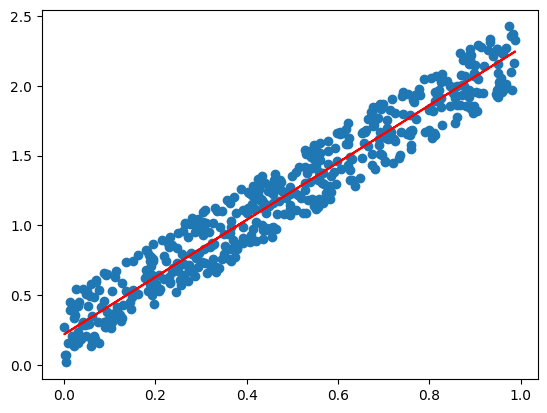

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_pred, c="red")
print("Training Cost :", model.evaluate(x,y,verbose=False))
print("Weight :", model.get_weights()[0])
print("Bias :", model.get_weights()[1])

# 3. Ablation Studies

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = load_wine()

In [ ]:
print("Shape :", df['data'].shape)

Shape : (178, 13)


In [ ]:
y = df["target"]
x = df['data']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=69)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Normalization
from keras.layers import Dense

MODEL:
- Model 1
  - Normalize
  - Dense (32, relu)
  - Dense (16, relu)
  - Dense (1, sigmoid)
- Model 2
  - Normalize
  - Dense (64, relu)
  - Dense (32, relu)
  - Dense (16, relu)
  - Dense (1, sigmoid)
- Model 3
  - Normalize
  - Dense (128, relu)
  - Dense (32, relu)
  - Dense (1, sigmoid)


In [ ]:
architecture = [
  Sequential([Normalization(),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")]),
  Sequential([Normalization(),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")]),
  Sequential([Normalization(),
    Dense(128, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")])
  ]

In [ ]:
opt1 = keras.optimizers.legacy.Adam(learning_rate=0.01)
opt2 = keras.optimizers.legacy.Adam(learning_rate=0.001)
opt3 = keras.optimizers.legacy.SGD(learning_rate=0.01)

optimizer = [opt1, opt2, opt3]

In [ ]:
epochs = [5,10]
output = pd.DataFrame(columns=["No of Layers","No of Params","Optimizer","Learning Rate","Epochs","Accuracy"])

for arch in architecture:
  for opti in optimizer:
    for epoch in epochs:
      model = arch
      model.compile(optimizer=opti, loss="BinaryCrossentropy",
      metrics="Accuracy")
      model.fit(x_train, y_train, epochs=epoch, verbose=False)
      y_pred = model.evaluate(x_test, y_test, verbose=False)
      output = output.append(pd.DataFrame(
      {"No of Layers" : [len(model.layers)],
      "No of Params" : [model.count_params()],
      "Optimizer" : [opti.get_config()["name"]],
      "Learning Rate" : [opti.learning_rate.numpy()],
      "Epochs" : [epoch],
      "Accuracy" : [y_pred[1]]}))

In [ ]:
output.head()

,No of Layers,No of Params,Optimizer,Learning Rate,Epochs,Accuracy
0,4,1020,Adam,0.010,5,0.388889
0,4,1020,Adam,0.010,10,0.388889
0,4,1020,Adam,0.001,5,0.388889
0,4,1020,Adam,0.001,10,0.388889
0,4,1020,SGD,0.010,5,0.388889


# 4. Regularization Techniques and Linear Regression

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = load_wine()

In [ ]:
print("Shape :", df['data'].shape)

Shape : (178, 13)


In [ ]:
y = df["target"]
x = df['data']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Normalization
from keras.layers import Dense, Dropout

In [ ]:
def plot_history(hist):
  plt.plot(hist.history['loss'], label = 'loss')
  plt.plot(hist.history['val_loss'], label='val loss')
  plt.title("Loss vs Val_Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [ ]:
output = pd.DataFrame(columns=["Model", "Accuracy", "Loss"])

In [ ]:
model = Sequential([Normalization(),
  Dense(64, activation="relu"),
  Dense(16, activation="relu"),
  Dense(1, activation="sigmoid")])

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="BinaryCrossentropy", metrics="Accuracy")

In [ ]:
hist = model.fit(x_train, y_train, epochs=20, verbose=False, validation_data=(x_test,y_test))
Loss, Accuracy = model.evaluate(x_test, y_test, verbose=False)

print("Validation Result")
print("Loss :", Loss)
print("Accuracy :", Accuracy)

Validation Result
Loss : -1.5288076400756836
Accuracy : 0.5277777910232544


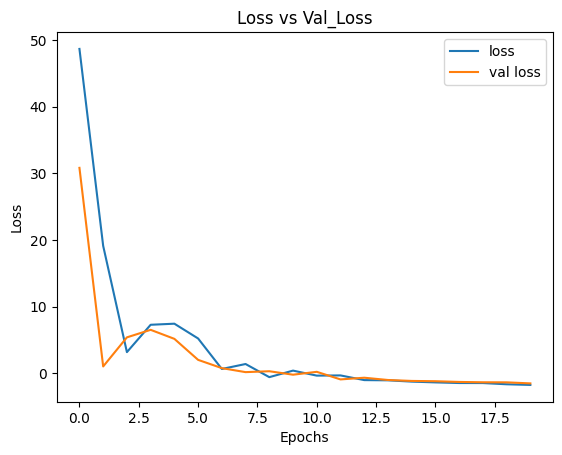

In [ ]:
plot_history(hist)

In [ ]:
output = output.append(pd.DataFrame(pd.DataFrame({"Model":["Base Model"],"Accuracy" :[Accuracy],"Loss" : [Loss]})), ignore_index=True)

### Base Model with L1 Regularization

Validation Result
Loss : 1.0363115072250366
Accuracy : 0.5833333134651184


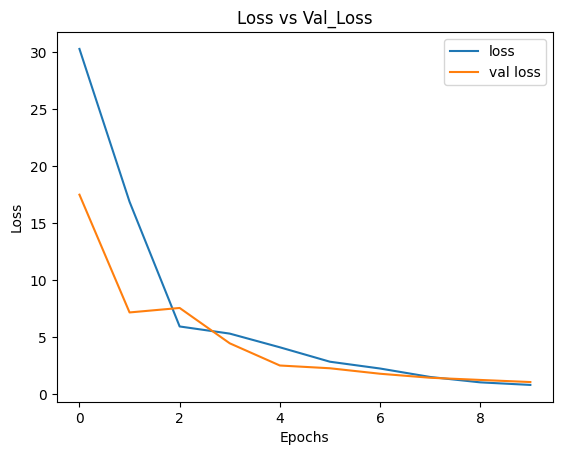

In [ ]:
model = Sequential([Normalization(),
  Dense(64, activation="relu", kernel_regularizer='l1'),
  Dense(16, activation="relu", kernel_regularizer='l1'),
  Dense(1, activation="sigmoid")])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="BinaryCrossentropy", metrics="Accuracy")
hist = model.fit(x_train, y_train, epochs=10, verbose=False,
validation_data=(x_test,y_test))

Loss, Accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Validation Result")
print("Loss :", Loss)
print("Accuracy :", Accuracy)

plot_history(hist)

output = output.append(pd.DataFrame(pd.DataFrame({"Model":["L1"],
"Accuracy" :[Accuracy],
"Loss" : [Loss]})),
ignore_index=True)


### Base Model with L2 Regularization

Validation Result
Loss : -0.7341384887695312
Accuracy : 0.6388888955116272


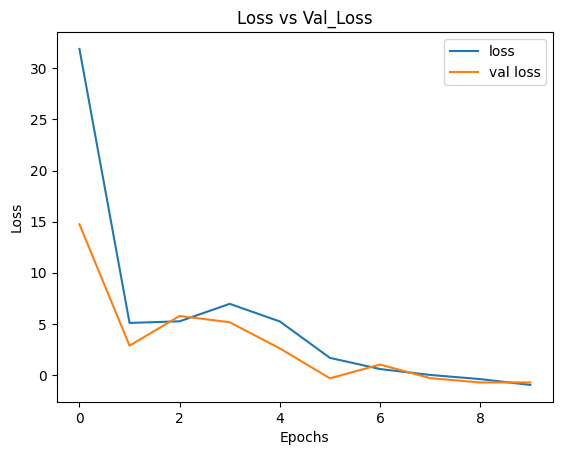

In [ ]:
model = Sequential([Normalization(),
  Dense(64, activation="relu", kernel_regularizer='l2'),
  Dense(16, activation="relu", kernel_regularizer='l2'),
  Dense(1, activation="sigmoid")])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="BinaryCrossentropy", metrics="Accuracy")

hist = model.fit(x_train, y_train, epochs=10, verbose=False,
validation_data=(x_test,y_test))

Loss, Accuracy = model.evaluate(x_test, y_test, verbose=False)

print("Validation Result")
print("Loss :", Loss)
print("Accuracy :", Accuracy)

plot_history(hist)

output = output.append(pd.DataFrame(pd.DataFrame({"Model":["L2"],
"Accuracy" :[Accuracy],
"Loss" : [Loss]})),
ignore_index=True)

### Base Model with Dropout

Validation Result
Loss : 2.392716407775879
Accuracy : 0.3888888955116272


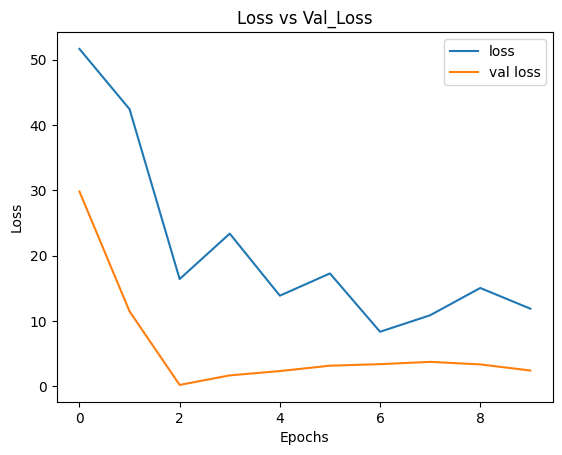

In [ ]:
model = Sequential([Normalization(),
  Dense(64, activation="relu"),
  Dropout(0.2),
  Dense(16, activation="relu"),
  Dropout(0.5),
  Dense(1, activation="sigmoid")])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="BinaryCrossentropy", metrics="Accuracy")

hist = model.fit(x_train, y_train, epochs=10, verbose=False,
validation_data=(x_test,y_test))

Loss, Accuracy = model.evaluate(x_test, y_test, verbose=False)

print("Validation Result")
print("Loss :", Loss)
print("Accuracy :", Accuracy)

plot_history(hist)

output = output.append(pd.DataFrame(pd.DataFrame({"Model":["Dropout"],
"Accuracy" :[Accuracy],
"Loss" : [Loss]})),
ignore_index=True)

### Base Model with Early Stopping

Validation Result
Loss : -35.241188049316406
Accuracy : 0.5277777910232544


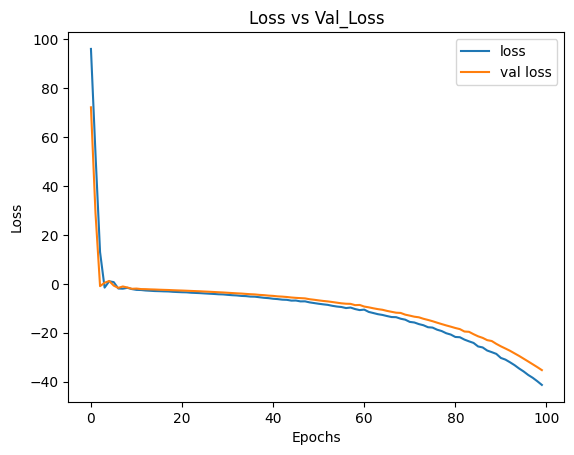

In [ ]:
model = Sequential([Normalization(),
  Dense(64, activation="relu"),
  Dense(16, activation="relu"),
  Dense(1, activation="sigmoid")])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="BinaryCrossentropy", metrics="Accuracy")

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

hist = model.fit(x_train, y_train, epochs=100, callbacks=[callback],
verbose=False, validation_data=(x_test,y_test))

Loss, Accuracy = model.evaluate(x_test, y_test, verbose=False)

print("Validation Result")
print("Loss :", Loss)
print("Accuracy :", Accuracy)

plot_history(hist)

output = output.append(pd.DataFrame(pd.DataFrame({"Model":["Early Stopping"],
"Accuracy" :[Accuracy],
"Loss" : [Loss]})),
ignore_index=True)

In [ ]:
output.head()

,Model,Accuracy,Loss
0,Base Model,0.527778,-1.528808
1,L1,0.583333,1.036312
2,L2,0.638889,-0.734138
3,Dropout,0.388889,2.392716
4,Early Stopping,0.527778,-35.241188


### Linear Regression

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = torch.arange(-5,5,0.2).view(-1,1)
y = x*0.69 + torch.rand(x.size())

In [ ]:
# Initialize Weights
w = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)

In [ ]:
# Training Loop
def predict():
  return (x*w + b)
def calc_loss(y_pred):
  return (((y - y_pred)** 2).sum() / 2*x.size()[0])
def train(epoch = 10000, lr = 0.0000001):
  global w, b
  for _ in range(epoch):
  # Predicition
  y_pred = predict()
  # Loss
  loss = calc_loss(y_pred)
  # Calculate Grad
  loss.backward()
  with torch.no_grad():
  w -= w.grad * lr
  b -= b.grad * lr
  w.grad.zero_()
  b.grad.zero_()
train()
print("Loss :", calc_loss(predict()))
plt.scatter(x, y)
plt.plot(x.detach().numpy(), predict().detach().numpy(), c="red")
plt.legend(["Ground Truth", "Predict"][::-1])
plt.show()

# 5. CNN Ablation Studies

# 6. CNN vs ANN MNIST

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = tensorflow.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = data.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_history = model.fit(x_train, y_train, epochs=10, verbose=0)
print("Accuracy : ", model.evaluate(x_test, y_test, verbose=0)[1])

Accuracy :  0.9786999821662903


In [ ]:
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28,
1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.summary()

In [ ]:
model_history = model.fit(x_train, y_train, epochs=10, verbose=0, batch_size=512)
print("Accuracy : ", model.evaluate(x_test, y_test, verbose=0)[1])

# 7. Sentiment Analysis using RNN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import datasets

(x_train, y_train),(x_test, y_test) = datasets.imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print("Shape")
print("Train X : ",x_train.shape)
print("Train Y : ",y_train.shape)
print("Test X : ",x_test.shape)
print("Test Y : ",y_test.shape)

Shape
Train X :  (25000,)
Train Y :  (25000,)
Test X :  (25000,)
Test Y :  (25000,)


In [ ]:
print("Maximum value of word index : ", max([max(i) for i in x_train]))
print("Maximum length of word : ",max([len(i) for i in x_train]))

Maximum value of word index :  9999
Maximum length of word :  2494


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Activation

In [ ]:
x_train = pad_sequences(x_train, maxlen = 269)
x_test = pad_sequences(x_test, maxlen = 269)


In [ ]:
rnn = Sequential([
    Embedding(10000, 32, input_length = 269),
    SimpleRNN(16, activation = 'relu'),
    Dense(1),
    Activation("sigmoid")
])

print(rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 269, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
rnn.compile(loss = 'binary_crossentropy',
            optimizer = 'rmsprop',
            metrics = ['accuracy'])


In [ ]:
history = rnn.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
196/196 [==============================] - 15s 67ms/step - loss: 0.6121 - accuracy: 0.6977
Epoch 2/10
196/196 [==============================] - 22s 114ms/step - loss: 0.4322 - accuracy: 0.8276
Epoch 3/10
196/196 [==============================] - 15s 79ms/step - loss: 0.3204 - accuracy: 0.8704
Epoch 4/10
196/196 [==============================] - 20s 102ms/step - loss: 0.2636 - accuracy: 0.8962
Epoch 5/10
196/196 [==============================] - 13s 66ms/step - loss: 0.2353 - accuracy: 0.9083
Epoch 6/10
196/196 [==============================] - 13s 66ms/step - loss: 0.2121 - accuracy: 0.9201
Epoch 7/10
196/196 [==============================] - 13s 67ms/step - loss: 0.1912 - accuracy: 0.9281
Epoch 8/10
196/196 [==============================] - 18s 90ms/step - loss: 0.1827 - accuracy: 0.9368
Epoch 9/10
196/196 [==============================] - 21s 105ms/step - loss: 0.1618 - accuracy: 0.9415
Epoch 10/10
196/196 [==============================] - 23s 119ms/step - loss: 0

In [ ]:
score = rnn.evaluate(x_test, y_test, verbose = 0)

print("Accuracy : ", score[1]*100)

Accuracy :  87.40000128746033


# 8. Text Generation Using GRU
We are trying to implement character level text generation.\
We feed the network a mapping of each characte present in the text to a unique number (*char_to_indices*)


In [ ]:
poem = """
Buffalo Bill’s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heaven’s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ring’d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what I’ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is also great
And would suffice.

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference."""

In [ ]:
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, GRU

from keras.optimizers import RMSprop
from keras.callbacks import LambdaCallback, ModelCheckpoint, ReduceLROnPlateau

import random
import sys

#### To read poem.txt

In [ ]:
with open('poems.txt', 'r') as file :
  text = file.read()

print(text)

In [ ]:
text = poem

To find all the characters that exists in the poem. Exactly like a dictionary. Sorted

In [ ]:
vocabulary = sorted(list(set(text)))

In [ ]:
print(vocabulary)

['\n', ' ', '!', ',', '-', '.', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'M', 'O', 'R', 'S', 'T', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', '—', '’']


Maps each character in the vocabulary to unique index.

In [ ]:
char_to_indices = dict((c,i) for i,c in enumerate(vocabulary))

In [ ]:
print(char_to_indices)

{'\n': 0, ' ': 1, '!': 2, ',': 3, '-': 4, '.': 5, ':': 6, ';': 7, 'A': 8, 'B': 9, 'C': 10, 'D': 11, 'E': 12, 'F': 13, 'H': 14, 'I': 15, 'J': 16, 'M': 17, 'O': 18, 'R': 19, 'S': 20, 'T': 21, 'Y': 22, 'a': 23, 'b': 24, 'c': 25, 'd': 26, 'e': 27, 'f': 28, 'g': 29, 'h': 30, 'i': 31, 'j': 32, 'k': 33, 'l': 34, 'm': 35, 'n': 36, 'o': 37, 'p': 38, 'q': 39, 'r': 40, 's': 41, 't': 42, 'u': 43, 'v': 44, 'w': 45, 'y': 46, 'z': 47, '—': 48, '’': 49}


Each index is mapped to a charcter.

In [ ]:
indices_to_char = dict((i,c) for i,c in enumerate(vocabulary))

In [ ]:
print(indices_to_char)

{0: '\n', 1: ' ', 2: '!', 3: ',', 4: '-', 5: '.', 6: ':', 7: ';', 8: 'A', 9: 'B', 10: 'C', 11: 'D', 12: 'E', 13: 'F', 14: 'H', 15: 'I', 16: 'J', 17: 'M', 18: 'O', 19: 'R', 20: 'S', 21: 'T', 22: 'Y', 23: 'a', 24: 'b', 25: 'c', 26: 'd', 27: 'e', 28: 'f', 29: 'g', 30: 'h', 31: 'i', 32: 'j', 33: 'k', 34: 'l', 35: 'm', 36: 'n', 37: 'o', 38: 'p', 39: 'q', 40: 'r', 41: 's', 42: 't', 43: 'u', 44: 'v', 45: 'w', 46: 'y', 47: 'z', 48: '—', 49: '’'}


steps = 3\
text = "Chennai is a city"\
say, max_length = 4\
len(text) = 17


---


0 to 12\
iteration1 i = 0\
sentences = "chen"\
next_char = "n"\


---


iteration2 i = 3\
sentences = "nnai"\
next_char = " "\


---


iteration3 i = 6\
sentences = "i is"\
next_char = " "\


---


iteration4 i = 9\
sentences = "s a "\
next_char = "c"

In [ ]:
# the maximum length of the text we would like to have as input
# so that we can feed 100 characters to the model everytime to
# generate a new character
max_length = 100

# steps indicate the no. of stepd we are taking at a time.
# example above.
steps = 5

# to map the sentenecs (not exactly)
# but the chars we found by sliding the window
sentences = []
next_chars = []

for i in range(0, len(text) - max_length, steps):
  sentences.append(text[i: i + max_length])
  next_chars.append(text[i + max_length])

In [ ]:
sentences[0]

'\nBuffalo Bill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four '

In [ ]:
next_chars[0]

'f'

for every sentence, we are trying to map the index of the character in the sentence(X) and also the next_character for the corresponding sentence(Y).\
Usng X, we first initilaise it to the dimensions of
- len(sentences)
- max_length
- len(vocabulary)
Using Y, we first initialise it to dimensions of
- len(sentences)
- len(vocabulary)

in X:
for ith sentence and every charcter t in that sentence, we are tyring to get the index of each of these characters. X would just be an embedding of the the sentences.\
in Y: for ith sentence, the last char in that sentence, we are marking the oindex of the next character for the sentence

In [ ]:
X = np.zeros((len(sentences), max_length, len(vocabulary)),dtype = np.bool)
y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool)

<ipython-input-21-7c45bb657ad3>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), max_length, len(vocabulary)),dtype = np.bool)
<ipython-input-21-7c45bb657ad3>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool)


In [ ]:
for i, sentence in enumerate(sentences):
  for t, char in enumerate(sentence):

    X[i, t, char_to_indices[char]] = 1
  y[i, char_to_indices[next_chars[i]]] = 1


Model:
- GRU (128, shape = (max_length, len(vocabulary)) *(as max_length is the length of the sentence and len(vocabulary) heps us trcak which characters are presen tin the sentence)*
- Dense (len(vocabulary))
- Activation -> softmax *(to obtain the probability of which charcter to generate next. the index of the next_char will have max value)*

In [ ]:
model = Sequential([
    GRU(128, input_shape = (max_length, len(vocabulary))),
    Dense(len(vocabulary)),
    Activation('softmax')
])

In [ ]:
optimizer = RMSprop(lr = 0.01)
model.compile(loss ='categorical_crossentropy', optimizer = optimizer)

The function helps us get the predictions as input\
*temperature determines the freedom the function has when generating text*\
Converts it to float array.\
takes the log and divides by the temperature.\
does the softmax for the output\
probabilities -> converted to multinomial distribution\
return the index where the probability is max.

In [ ]:
def sample_index(preds, temperature = 1.0):

  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)

  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)

  return np.argmax(probas)

generated -> is the total text after generation.\
we start to generate for a randomly picked sentence\
we have multiple diversities.\
our sentence will be the randomly picked sentence.\
we will have it as generated.\
now, we have a for loop ( to run for 400 times). we have an x_pred prediction vector.
for all the characters in the sentence, we are trying to map the charcters indices existing in that sentence we are making the prediction for.\
We make a prediction for the sentence.\
we get the index for the prediction made using sample_index function.\
we will try to get the charcter using ist index.\
we add that charcater to the generated sequence.\
now the sentence shifts 1 character with so it also contains the newly generated character to generate the next character.

In [ ]:
def on_epoch_end(epoch, logs):
  print()
  print('---- Generating text aftr Epoch : %d' %epoch)

  start_index = random.randint(0, len(text) - max_length - 1)
  for diversity in [0.2,0.5,1,0,1.2]:

    print('----- diversity: ', diversity)

    generated = ''

    sentence = text[start_index : start_index + max_length]

    generated += sentence
    print("---- Generating with seed : " + sentence)
    sys.stdout.write(generated)

    for i in range(400):

      x_pred = np.zeros((1, max_length, len(vocabulary)))

      for t, char in enumerate(sentence):
        x_pred[0, t, char_to_indices[char]] = 1

      preds = model.predict(x_pred, verbose = 0)[0]
      next_index = sample_index(preds, diversity )
      next_char = indices_to_char[next_index]
      generated += next_char
      sentence = sentence[1:] + next_char
      sys.stdout.write(next_char)
      sys.stdout.flush()

this is a custom callback funtion

In [ ]:
print_callback = LambdaCallback(on_epoch_end = on_epoch_end)

We have a helper function to save the model after each epoch in which the loss drecreses.

In [ ]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor ='loss',
verbose = 1, save_best_only = True,
mode ='min')

helper function to reduce learning rate each time learnign plateaus

In [ ]:
reduce_alpha = ReduceLROnPlateau(monitor ='loss', factor = 0.2,
patience = 1, min_lr = 0.001)
callbacks = [print_callback, checkpoint, reduce_alpha]

Training the GRU model

In [ ]:
model.fit(X, y, batch_size = 128, epochs = 15, callbacks = callbacks)

Epoch 1/15
1/3 [=========>....................] - ETA: 0s - loss: 3.8133
---- Generating text aftr Epoch : 0
----- diversity:  0.2
---- Generating with seed : lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way l
lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way la s oaeFa eed
 IO;qkty-b.hn;Ofy vzm.Sdi frlm;c,fl-yBbasb   t zi pDydh sM
waCy.p   aowBan—,S hs.i icoe aCtzjlaacFbcFgncc T!AabhClSc rtd
nd Rh tn,yR  jiT:jdIChzFFdde’A
cdl:avqfDc
 t
B’welea
C
— j:sTo feeJfAet’ gzte.ja-afath a  wl,-hcoCy-vdab kDet e hTCh qS  cA o   etsD,   eqhA aD h !wth
  thf!hw A. Hkjev qsoT hekjqy-Yi zisvs Yk o eeJ’afhem
Ik  DqbJ j  A ut Sg.Tkom
fMCdp
fotegohcgD Reabdn plr  fo 
h:----- diversity:  0.5
---- Generating with seed : lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way l
lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowin

KeyboardInterrupt: ignored

Funtion to generate text gievn length and diversity.
1. random starting index
2. generated string
3. random sentence of length max_lenght starting from the random index
4. for the length given,
  - have an empty x_pred
  - fill the x_pred using the mapping
5. predict for the x_pred
6. get the index using pred
7. get the character, add it to generated
8. change the sentence (slide)
9. end for
10. return the generated text

In [ ]:
def generate_text(length, diversity):
  start_index = random.randint(0, len(text) - max_length - 1)
  generated = ''
  sentence = text[start_index: start_index + max_length]
  generated += sentence
  for i in range(length):
    x_pred = np.zeros((1, max_length, len(vocabulary)))
    for t, char in enumerate(sentence):
      x_pred[0, t, char_to_indices[char]] = 1.
    preds = model.predict(x_pred, verbose = 0)[0]
    next_index = sample_index(preds, diversity)
    next_char = indices_to_char[next_index]
    generated += next_char
    sentence = sentence[1:] + next_char
  return generated

In [ ]:
print(generate_text(500, 0.2))

# 9. LSTM vs GRU

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense,SimpleRNN,LSTM,GRU,Embedding
from keras.preprocessing import sequence

from keras.datasets import imdb

In [ ]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train = sequence.pad_sequences(x_train,200)
x_test = sequence.pad_sequences(x_test,200)

In [ ]:
GRU_Model = Sequential([
  Embedding(10000,128),
  GRU(128,dropout=0.2),
  Dense(128,activation='relu'),
  Dense(1,activation='sigmoid')])

In [ ]:
GRU_Model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1395713 (5.32 MB)
Trainable params: 1395713 (5.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
GRU_Model.compile(loss='binary_crossentropy'
,optimizer='adam',
metrics=['accuracy'])

In [ ]:
history_GRU = GRU_Model.fit(x_train,y_train,
                            epochs=2,validation_data=(x_test,y_test),
                            batch_size=32)

Epoch 1/2
782/782 [==============================] - 61s 72ms/step - loss: 0.4299 - accuracy: 0.7964 - val_loss: 0.3060 - val_accuracy: 0.8713
Epoch 2/2
782/782 [==============================] - 24s 31ms/step - loss: 0.2180 - accuracy: 0.9152 - val_loss: 0.2803 - val_accuracy: 0.8821


In [ ]:
LSTM_Model = Sequential(
    [Embedding(10000,128),
    LSTM(128,dropout=0.2),
    Dense(1,activation='sigmoid')])

In [ ]:
LSTM_Model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [ ]:
history_LSTM = LSTM_Model.fit(x_train,
                              y_train,epochs=2,
                              validation_data=(x_test,y_test),
                              batch_size=32)

Epoch 1/2
782/782 [==============================] - 76s 94ms/step - loss: 0.4186 - accuracy: 0.8108 - val_loss: 0.3964 - val_accuracy: 0.8304
Epoch 2/2
782/782 [==============================] - 18s 22ms/step - loss: 0.2660 - accuracy: 0.8970 - val_loss: 0.3209 - val_accuracy: 0.8646


In [ ]:
RNN_Model = Sequential(
    [Embedding(10000,32),
    SimpleRNN(32,activation='relu'),
    Dense(1,activation='sigmoid')])

In [ ]:
RNN_Model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
history_RNN = RNN_Model.fit(x_train,y_train,epochs=2,
                            batch_size=32,
                            validation_data=(x_test,y_test))

Epoch 1/2
782/782 [==============================] - 223s 283ms/step - loss: 0.5272 - accuracy: 0.7213 - val_loss: 0.3892 - val_accuracy: 0.8319
Epoch 2/2
782/782 [==============================] - 168s 215ms/step - loss: 0.3549 - accuracy: 0.8460 - val_loss: 0.4841 - val_accuracy: 0.7652


# 10. Object Detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
(x_train, y_train), (x_test,y_test ) = keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential([
    Conv2D(32, (5,5), padding = 'same', activation = 'relu', input_shape = (32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (5,5), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (5,5), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(128, activation= 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
optim = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = optim, loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model_history = model.fit(x_train, y_train, epochs = 5,
                          batch_size = 128,
                          validation_data = (x_test, y_test))

Epoch 1/5
391/391 [==============================] - 316s 807ms/step - loss: 1.8950 - accuracy: 0.3084 - val_loss: 1.7916 - val_accuracy: 0.3605
Epoch 2/5
391/391 [==============================] - 319s 816ms/step - loss: 1.6946 - accuracy: 0.3913 - val_loss: 1.6246 - val_accuracy: 0.4162
Epoch 3/5
391/391 [==============================] - 307s 785ms/step - loss: 1.5564 - accuracy: 0.4385 - val_loss: 1.4918 - val_accuracy: 0.4611
Epoch 4/5
391/391 [==============================] - 285s 728ms/step - loss: 1.4795 - accuracy: 0.4691 - val_loss: 1.4222 - val_accuracy: 0.4893
Epoch 5/5
391/391 [==============================] - 296s 756ms/step - loss: 1.4047 - accuracy: 0.4959 - val_loss: 1.3960 - val_accuracy: 0.4972


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

In [ ]:
_, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print("Accuracy : ",accuracy)

Accuracy :  0.49720001220703125


# 11. Fraud Detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
print("Shape :", df.shape)
df.head()

In [ ]:
df[df["Class"] == 0]["Amount"].describe()

In [ ]:
### DownSampling
df["Class"].value_counts()

In [ ]:
zero_df = resample(df[df["Class"] == 0], n_samples=492)
sample_df = pd.concat([df[df["Class"] == 1], zero_df], ignore_index=True)

In [ ]:
### Correlation Matrix
sample_df.corr()

In [ ]:
x = sample_df.iloc[:,:-1].values
y = sample_df.iloc[:, -1].valuesx_train, x_test, y_train, y_test = train_test_split(x, y, random_state=69,
test_size=0.2)

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

# 12. AutoEncoder

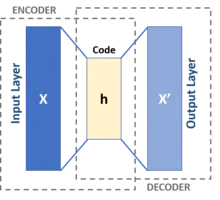

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
input_img = keras.Input(shape=(28,28,1))

In [ ]:
x = Conv2D(16,(3,3),activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(8,(3,3),activation = 'relu', padding = 'same')(x)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(8,(3,3),activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D((2,2), padding = 'same')(x)

In [ ]:
x = Conv2D(8,(3,3),activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation = 'sigmoid',padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img , decoded)
autoencoder.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['acc'])

In [ ]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 7, 7, 8)           584 

In [ ]:
autoencoder.fit(x_train, x_train, batch_size = 128, epochs = 7, validation_data=(x_test,x_test))

Epoch 1/7
469/469 [==============================] - 6s 9ms/step - loss: 0.1997 - acc: 0.7963 - val_loss: 0.1423 - val_acc: 0.8022
Epoch 2/7
469/469 [==============================] - 5s 11ms/step - loss: 0.1326 - acc: 0.8063 - val_loss: 0.1251 - val_acc: 0.8071
Epoch 3/7
469/469 [==============================] - 6s 13ms/step - loss: 0.1221 - acc: 0.8084 - val_loss: 0.1175 - val_acc: 0.8083
Epoch 4/7
469/469 [==============================] - 4s 9ms/step - loss: 0.1168 - acc: 0.8094 - val_loss: 0.1136 - val_acc: 0.8084
Epoch 5/7
469/469 [==============================] - 3s 6ms/step - loss: 0.1132 - acc: 0.8101 - val_loss: 0.1104 - val_acc: 0.8092
Epoch 6/7
469/469 [==============================] - 3s 7ms/step - loss: 0.1106 - acc: 0.8106 - val_loss: 0.1083 - val_acc: 0.8103
Epoch 7/7
469/469 [==============================] - 3s 7ms/step - loss: 0.1088 - acc: 0.8109 - val_loss: 0.1065 - val_acc: 0.8105


In [ ]:
autoencoder.evaluate(x_test,x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1105 - acc: 0.8080


[0.11054952442646027, 0.8080427050590515]

In [ ]:
x_test[5].shape

(28, 28)

In [ ]:
x_pred = autoencoder.predict(x_test[5].reshape(1,28,28,1))

1/1 [==============================] - 0s 343ms/step


In [ ]:
x_pred.shape

(1, 28, 28, 1)

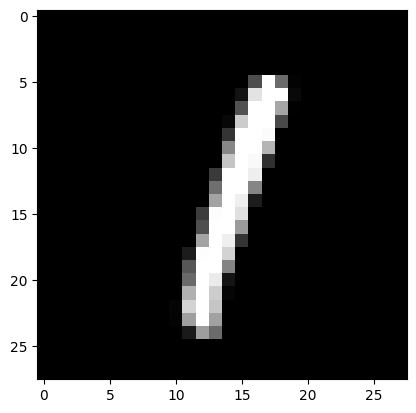

In [ ]:
plt.imshow(x_test[5]);

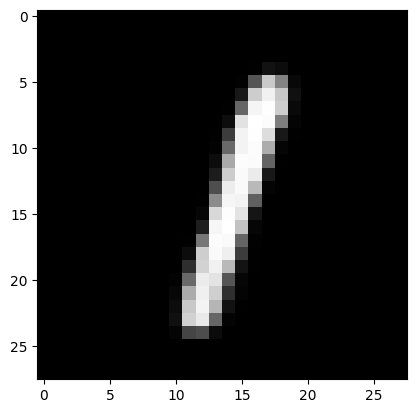

In [ ]:
plt.imshow(x_pred.reshape(28,28));

# 13. Anomaly Detection System
observing rare events and observations\
its statistically different from the rest of the observations.

Normal data : Handwritten digits\
Anomaly data : fashion MNIST\
Anomaly detection system -> trained by normal data, identifues normal and anomaly data during testing\
**Autoencoder** : encoder decoder systme to reconstrcut the input as the output.\
Goal : train autoencoder with smaller reconstruction error. but, reconstructing and image from anomaly data with larger reconstruction error.\
using the reconstruction errors, we decide out threshold.

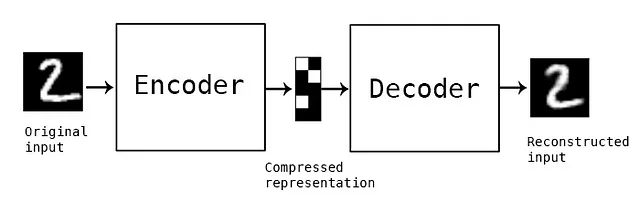

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import datasets

In [ ]:
#normal data
digit = datasets.mnist.load_data()

#anomaly data
fashion = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#data to train and test from normal data
x_train = digit[0][0]  #train data
x_test = digit[1][0]  #test data

#testing using anomaly data
fashion_test = fashion[1][0]

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#normalise the data
x_train = x_train/255
x_test = x_test / 255

#reshape it to grayscale
x_train = x_train.reshape(len(x_train), 28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [ ]:
fashion_test = fashion_test / 255
fashion_test = fashion_test.reshape(len(fashion_test),28,28,1)

In [ ]:
def plot_image(array, sample_size = 5):

  index = 1
  plt.figure(figsize = (20,4))

  for i in np.random.choice(array.shape[0], size = sample_size):
    ax = plt.subplot(2, 10, index)

    index += 1

    plt.imshow(array[i].reshape(28,28))
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()


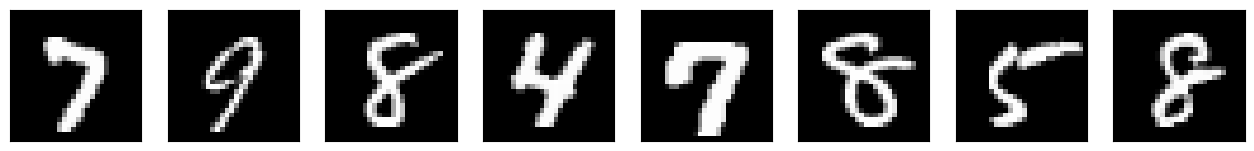

In [ ]:
plot_image(x_train, sample_size = 8)

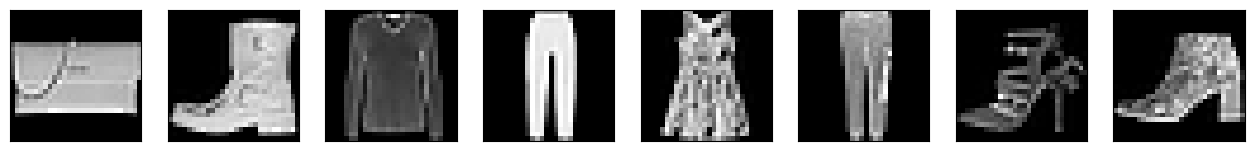

In [ ]:
plot_image(fashion_test, sample_size = 8)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
input_img = keras.Input(shape = (28,28,1))

#### Encoder
- Conv2D-> 16, (3,3), relu (input_img)
- MaxPooling (2,2) same pad
- Conv2D 8 (3,3), relu
- Maxpool
- COnv2D 8 (3,3), relu
- Maxpool

In [ ]:
x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D((2,2), padding = 'same')(x)

#### Decoder
- Conv2d (8, (3,3), relu, same) (encoded)
- Upsampling2D
- Conv2D 8, (3,3), relu, same
- Upsampling
- Conv2D 16
- Upsampling
- Conv 1, (3,3) sigmoid

In [ ]:
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D( 1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 7, 7, 8)           584 

In [ ]:
autoencoder.fit(x_train, x_train,epochs = 5, batch_size = 64,
                validation_data = (x_test, x_test))

Epoch 1/5
938/938 [==============================] - 9s 7ms/step - loss: 0.1793 - accuracy: 0.7985 - val_loss: 0.1302 - val_accuracy: 0.8049
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1229 - accuracy: 0.8081 - val_loss: 0.1154 - val_accuracy: 0.8090
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1132 - accuracy: 0.8100 - val_loss: 0.1093 - val_accuracy: 0.8103
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.1084 - accuracy: 0.8109 - val_loss: 0.1056 - val_accuracy: 0.8104
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1054 - accuracy: 0.8114 - val_loss: 0.1030 - val_accuracy: 0.8103


In [ ]:
digit_predict = autoencoder.predict(x_test)
fashion_predict = autoencoder.predict(fashion_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
digit_predict.shape

(10000, 28, 28, 1)

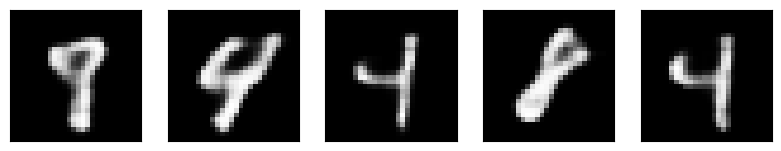

In [ ]:
plot_image(digit_predict)

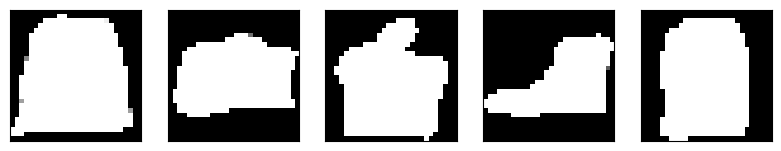

In [ ]:
plot_image(fashion_predict)

In [ ]:
reconstruction_error_digit = []
reconstruction_error_fashion = []

In [ ]:
for i in x_test[:100]:
  error = autoencoder.evaluate([i], [i], verbose = 0)[0]
  reconstruction_error_digit.append(error)

for i in fashion_test[:100]:
  error = autoencoder.evaluate([i],[i], verbose= 0)[0]
  reconstruction_error_fashion.append(error)

In [ ]:
reconstruction_error_digit = np.array(reconstruction_error_digit)
reconstruction_error_fashion = np.array(reconstruction_error_fashion)

In [ ]:
threshold = [reconstruction_error_digit.mean() - 2* reconstruction_error_digit.std(),
             reconstruction_error_digit.mean() + 2* reconstruction_error_digit.std()]

threshold

[0.17073414301462536, 0.7235807981532061]

Given an image to test,
1. evaulate on the model
2. check if error is not  within range.

In [ ]:
def detect_anomaly(image):

  error = autoencoder.evaluate([image],[image], verbose = 0)[0]

  if error >= threshold[0] and error <= threshold[1]:
    print("No Anomaly")
    return 0

  else :
    print("Anomaly")
    return 1


In [ ]:
accuracy = 0
for i in fashion_test[10:20]:
  accuracy += detect_anomaly(i)

print("Accuracy : ", accuracy)

Anomaly
No Anomaly
Anomaly
Anomaly
Anomaly
Anomaly
Anomaly
Anomaly
Anomaly
Anomaly
Accuracy :  9
